<a href="https://colab.research.google.com/github/dario248/F-Score-Umbral-Optimo/blob/main/Umbral_Optimo_F_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Obtención del umbral óptimo para maximizar F-Score**

***Data Science, Coderhouse***

[*Darío Páez*](https://www.linkedin.com/in/darioandrespaez/)

paezdario24@gmail.com


## **Matriz de Confusión**

Las principales métricas para evaluar un algoritmo de clasificación pueden obtener a través de la **Matriz de Confusión**. 
Está matriz permite visualizar el desempeño de un algoritmo de **aprendizaje supervisado**. En la matriz se obtiene un contraste entre las **predicciones** realizadas por el modelo y la **verdadera clasificación** de los **datos** analizados. 

En la siguiente figura, se observa una matriz de confusión para una **clasificación binaria**. Sobre este tipo de clasificación nos vamos a centrar para analizar la **optimización** de la métrica **F Score**. 

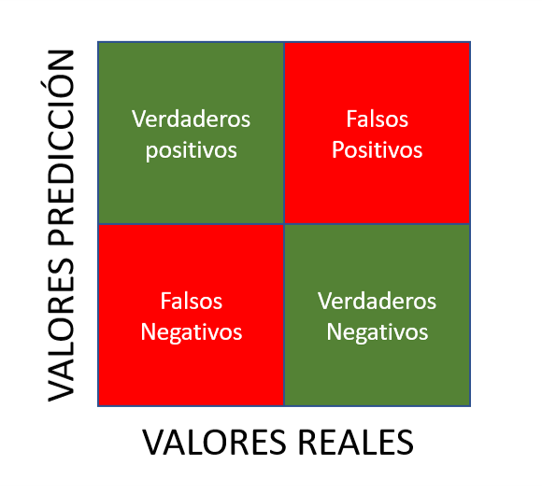

Las entradas de la matriz se definen de la siguiente manera (en este caso utilizamos las siglas en inglés para que corresponda con la bibliografía):


*   **Verdadero Positivo (TP)**: El modelo predice el dato como positivo y es realmente positivo. 
*   **Falso Positivo (FP)**: El modelo predice el dato como positivo y en realidad es negativo.
*   **Verdadero Negativo (TN)**: El modelo predice el dato como negativo y es realmente negativo.
*   **Falso Negativo (FN)**: El modelo predice el dato como negativo cuando en realidad es positivo. 





## **F1-Score**

A través de la matriz de confusión podemos obtener el párametro **F1-Score**. Esta parámetro nos permite combinar dos métricas en una sola: la **precisión** y la **sensibilidad** o **exhaustividad** (**recall** en inglés). Por lo tanto, es muy útil para analizar su rendimiento combinado. 

Para obtener la métrica **F1-Score** debe realizarse la **media armónica** entre la precisión y la sensibilidad, como muestra la siguiente fórmula:

$$F1 = 2 * \frac{Precision * Recall}{Precision + Recall} \ (1)$$ 

En este caso, **F1** pondera de igual manera la precisión y la sensibilidad. Es decir, ambas son igual de importantes en el análisis. En algunas situaciones, es probable que se quiera dar prioridad o mayor importancia a la sensibilidad. Por ejemplo, en aquellas situaciones donde es más importante **minimizar** la cantidad de **falsos negativos** como el caso de una enfermedad o una posibilidad de accidente. 

Para darle un mayor peso a la sensibilidad se puede utilizar la fórmula general de **F** (ecuación 2), asignándole a **$β$** un valor mayor que 1. 

$$ F_{β} = (1 + β^2) * \frac{Precision * Recall}{β^2Precision + Recall} \ (2)$$

## **Optimización de F1-Score**

Cuando analizamos nuestro modelo predictor, nos interesa que tanto la **precisión** y la **sensibilidad** sean lo más alto posible. En definitiva, nos interesa que nuestro modelo obtenga un valor de F1-Score alto. Para lograr esto se analiza la relación entre el valor más alto de F1 que puede ser conseguido y el **umbral de decisión** que optimiza este valor. 

El **umbral de decisión** es un valor determinado que divide el rango de valores de salida en las dos posibles clasificaciones. Es decir, si la salida supera ese umbral pertenecerá a una clasificación, y si el valor de salida es menor al umbral pertenecerá a la otra clasificación. 

Establecer este valor de **umbral**, es lo que permitirá la **optimización** de la métrica **F1-Score** para un determinado modelo. Dos modelos idénticos pero con umbrales distintos pueden resultar en valores de precisión y sensibilidad distintos. 

## **Demostración**


En esta sección, se detalla el **procedimiento** y los **conceptos** tenidos en cuenta para la obtención del umbral que optimiza el valor de **F1-Score**. Este desarrollo está basado en el trabajo de [Lipton et al. 2014](https://arxiv.org/pdf/1402.1892.pdf) [1]. Sin embargo, se realizará un análisis teórico sin entrar en tanto detalle sobre las demostraciones matemáticas. Para poder seguir la lectura del trabajo original, se menciona en cada caso la notación seguida por la bibliografía. Cabe destacar que la optimización de **F1** se puede realizar también para clasificaciones de múltiples etiquetas pero, debido a su complejidad y extensión, solo analizamos la **clasificación binaria**.

En primer lugar, debemos tener en cuenta la definición de **precisión** y **sensibilidad** (a partir de ahora la llamaremos **recall** para que coincida con las fórmulas de la bibliografía) en base a los resultados que nos da la matriz de confusión. La **precisión** se calcula como la cantidad de casos verdaderos positivos sobre la cantidad total de positivos que predijo el modelo (ecuación 3). El **recall** se calcula como la cantidad de casos verdaderos positivos sobre la cantidad total de positivos reales (ecuación 4).

$$Precision = \frac{TP}{TP + FP} \ (3)$$ 

$$Recall = \frac{TP}{TP + FN} \ (4)$$ 

Teniendo en cuenta las ecuaciones 3 y 4, podemos reescribir la ecuación de F1 en función de los valores que nos brinda la matriz de confusión. Por lo tanto, combinando las ecuaciones 1, 3 y 4 se obtiene la ecuación 5, luego de aplicar algunas operaciones. Está ecuación será **importante** una vez se llegue al final de la demostración. 

$$F1 = \frac{2TP}{2TP + FP + FN} \ (5)$$ 

Luego, se establecen algunas definiciones principales para poder realizar un análisis matemático.

La salida del clasificador nos da valores reales representados por $s$, mientras que, la variable $t$ representa la etiqueta o clasificación real de un dato. De esta manera, se asume que existen dos distribuciones de probabilidad conocidas. La primera $p(s|t=1)$ representa la probabilidad de que se tenga un valor $s$ cuando la clasifación real es 1 o positiva. La segunda $p(s|t=0)$ representa la probabilidad de que se tenga un valor $s$ cuando la clasificación real es 0 o negativa. 

Siguiendo con las definiciones, $D$ representa una regla de decisión que asignará a cada valor de $s$ una etiqueta de clasificación 1 (positiva) o 0 (negativa). Además, se define un ratio base ($b$), que representa la probabilidad de que la clasificación real de un dato sea 1 (es decir, $p(t=1)$). 

En un próximo paso, se busca obtener las entradas de la matriz de confusión (**tp, fp, fn y tn**) en función de las probabilidades condicionales mencionadas y la probabilidad base $b$. Aplicando las definiciones mencionadas arriba y el [teorema de Bayes](https://es.wikipedia.org/wiki/Teorema_de_Bayes) [2] se obtienen las siguientes expresiones para la cantidad de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.


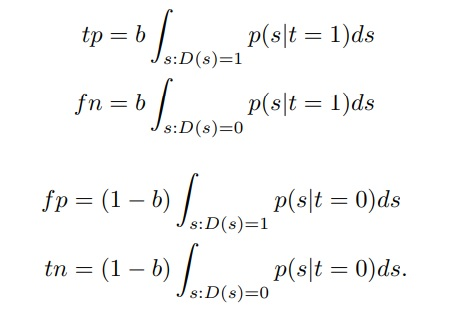

Para continuar el análisis, suponemos que la regla de decisión $D$ ha asignado una etiqueta para todo el rango de $s$ excepto para una región que llamaremos $Δ$. A partir de esta suposición, buscamos decidir si una muestra $s$ dentro del rango $Δ$ debe ser clasificada como positiva o negativa. 

Luego, calculamos F1 si $Δ$ es clasificado como positivo. A esta nueva fórmula que se obtiene se la llama **F1'**. El mismo procedimiento se realiza si $Δ$ es clasificado como negativo, al nuevo resultado de F se lo denomina **F1''**. Acá no mostraremos las expresiones de **F1'** y **F1''** pero son obtenidas al aplicar las definiciones de probabilidad mencionadas anteriormente.

La condición para decidir si $Δ$ es clasificado como positivo es que **F1'** > **F1''**. En otras palabras, si $Δ$ es clasificado como positivo, el valor **F1** debe ser mayor que en el caso de que $Δ$ sea clasificado como negativo. Así, nos aseguramos que estamos realizando una clasificación que mejora nuestro valor **F1**.

Partiendo de **F1'** > **F1''** y haciendo algunas operaciones matemáticas, se obtiene que para maximizar **F1**, un valor $s$ debe ser asignado a la clasificación positiva si y solo si se cumple la condición de la siguiente ecuación:

$$\frac{b*p(s|t=1)}{(1-b)*p(s|t=0)} \geq \frac{TP}{TP + FP + FN} \ (6)$$ 

Recordemos que: 


*   $b$ es la probabilidad de que la clasificación real sea positiva
*   $1-b$ es la probabilidad de que la clasificación real sea negativa
*   $p(s|t=1)$ es la probabilidad de una muestra $s$ sabiendo que la clasificación real es positiva.
*   $p(s|t=0)$ es la probabilidad de una muestra $s$ sabiendo que la clasificación real es negativa.





Para concluir el análisis se supone la condición de que la salida del algoritmo clasificador está **calibrada** (Corolario 1 en la bilbiografía). Esto es, que los valores de salida $s$ representan la probabilidad de que la clasificación real sea positiva. La expresiones matemáticas para esta condición son: 

$p(t=1|s) = s$ 

$p(t=0|s) = 1 - s$

A través de esta definición, aplicando el teorema de Bayes nuevamente y comparando con la ecuación 5 se llega a la siguiente ecuación: 

$$s \geq \frac{TP}{2TP + FP + FN} =\frac{F}{2} \ (7)$$ 

La ecuación 7 nos dice que para optimizar el valor de **F1**, el **umbral** de decisión debe ser igual a $F/2$. 
En otras palabras, una predicción es asignada a la clasificación positiva solo si su valor es igual o mayor a la mitad del valor de **F1** óptimo.

### **Conclusión**

Una vez ajustado nuestro modelo de **clasificación binaria**, se puede realizar una evaluación a través de la **matriz de confusión**. De esta matriz de confusión, podemos obtener y calcular el valor de **F1-score**. Si el modelo de clasificación binaria está **calibrado**, se puede modificar el **umbral de decision** a un valor de **F/2** con el objetivo de mejorar tanto la **precisión** como la **sensibilidad** de nuestro modelo. 

## **Código de ejemplo**

En esta sección se muestra un código extraído del artículo del blog "[Hippocampus's Garden](https://hippocampus-garden.com/f1/)" [3]. El objetivo comprobar que el **umbral óptimo** es la mitad del valor **F1-Score**.

En primer lugar, importamos la librerías necesarias.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.calibration import calibration_curve
from tqdm.notebook import tqdm

Luego, generamos un conjunto de datos **balanceado** con 20 mil muestras binarias (igual cantidad de positivos y negativos). Definimos una columna **objetivo** con los valores positivos y negativos. Además, definimos una columna de **atributos** que la rellenamos con dos **distribuciones normales** (`np.random.normal()`) con $σ$ (desvío estándar) igual a 1 y **media** 0.5 para el caso de los datos positivos y -0.5 para el caso de los datos negativos. Para terminar de armar el conjunto de datos concatenamos todo en una única matriz.

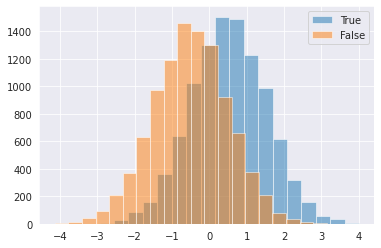

In [ ]:
n_pos = 10000
n_neg = 10000
#Creación del conjunto de datos
df = pd.concat([
                pd.DataFrame({
                    'target': [True]*n_pos,
                    'feature': np.random.normal(loc=0.5, scale=1.0, size=n_pos)
                    }),
                pd.DataFrame({
                    'target': [False]*n_neg,
                    'feature': np.random.normal(loc=-0.5, scale=1.0, size=n_neg)
                    })
], ignore_index=True)

#Graficamos los histogramas de las distribuciones
plt.hist(df.query('target').feature, bins=20, alpha=0.5, label='True')
plt.hist(df.query('not target').feature, bins=20, alpha=0.5, label='False')
plt.legend();

Como mencionamos en la demostración, para poder aplicar la optimización necesitamos que la salida del clasificador esté **calibrada**. En este caso, como nosotros generamos los mismos datos, ya sabemos que tipo de **distribución de probabilidad** siguen. Sabiendo su distribución, podemos utilizar la **función de densidad de probabilidad** para obtener la probabilidad para cada atributo de entrada. 

La función de densidad de probabilidad para una **[distribución gaussiana o normal](https://www.statlect.com/fundamentals-of-statistics/normal-distribution-maximum-likelihood)** [4] se muestra en la siguiente ecuación:

$$f_{X}(x_{j}) = (2πσ^{2})^{-1/2}\ exp(-\frac{1}{2}\frac{(x_{j} - μ)^{2}}{σ^{2}})\ (8) $$

En el siguiente bloque de código, la función `likelihood_gaussian` nos permite generar la ecuación 8, dado un determinado vector de elementos (`arr`), la media de la distribución (`mu`) y un desvío (`sigma`).  





In [ ]:
#Creamo una función de densidad de probabilidad que sigue la ecuación 8

def likelihood_gaussian(arr, mu, sigma):
    a = - (arr - mu) ** 2 / (2 * sigma ** 2)
    return np.exp(a) / ((2  * np.pi) ** 0.5 * sigma)

#Aplica la ecuacion 10 luego de calcular las probabilidades 
#de la distribución positiva y negativa.

def posterior(arr, mu_pos, mu_neg, sigma):
    p_pos = likelihood_gaussian(arr, mu_pos, sigma)
    p_neg = likelihood_gaussian(arr, mu_neg, sigma)
    return (0.5 * p_pos) / (0.5 * p_pos + 0.5 * p_neg)

Además, hay otra función llamada por el término **'posterior'** que hace referencia a la **probabilidad condicional** de un evento **A** dado que sucedió un evento **B**. Para este caso, el dato que usaremos como predicción es la probabilidad de que la muestra tomada pertenezca a la distribución 1 sabiendo que la clasificación real de esa muestra es positivo. Recordemos que nuestro conjunto de atributos está formado por **dos distribuciones distintas**. A la distribución que tiene media 0.5 la llamaremos ($s_{1}$) y a la distribución que tiene media -0.5 la llamaremos ($s_{0}$). Utilizando la fórmula de Bayes podemos obtener la probabilidad condicional siguiendo la siguiente ecuación:

$$ P(s_{1}|t=1) = \frac{P(t=1|s_{1}) P(s_{1})}{P(t=1|s_{1}) P(s_{1}) + P(t=1|s_{0}) P(s_{0})} \ (9)$$ 

Recordemos que $t=1$ representa que la clasificación real de la muestra es positiva. Además, $P(s_{1}) = P(s_{0}) = 0,5$, dado que el conjunto de datos esta balanceado y cada distribución tiene 10 mil muestras. En definitiva, $P(s_{1})$ representa la probabilidad de tomar un dato del conjunto y que pertenezca a la distribución 1. Lo mismo sucede con la distribución 0. 

Teniendo en cuenta esto y obteniendo las probabilidades de la función `likelihood_gaussian`, la ecuación 9 la podemos reescribir como la ecuación 10. Finalmente, es esta ecuación la que utiliza la función `posterior`.


$$ P(s_{1}|t=1) = \frac{P_{pos} * 0,5}{P_{pos} * 0,5 + P_{neg} * 0,5} \ (10)$$

En el siguiente bloque, calculamos la ecuación 10 llamando a la función `posterior`con los datos de la columna de atributos, las medias de las distribuciones y su desvío. 

Luego, usamos la función `calibration_curve`de `sklearn.calibration` para comprobar que las predicciones están realmente calibradas [[5]](https://scikit-learn.org/stable/modules/calibration.html#calibration). La función nos devuelve dos vectores: el vector `trues` contiene la fracción de casos reales positivos para cada bin (eje y) y el vector `preds` contiene la media de la probabilidad predicha para cada bin (eje x). Es decir, estamos comparando la frecuencia real de los casos positivos contra la probabilidad de las predicciones. Cabe destacar que este análisis se realiza agrupando los datos en bins, pudiendo configurar la cantidad con la variable `n_bins`. Finalmente, realizamos un gráfico de la comparación. 

En la figura se aprecia que los datos están muy bien calibrados ya que la calibración perfecta nos debe dar como resultado una función lineal.

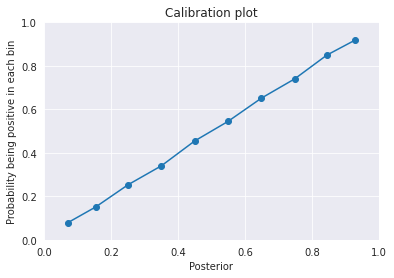

In [ ]:
y_prob = posterior(df.feature.values, 0.5, -0.5, 1)
trues, preds = calibration_curve(df.target, y_prob, n_bins=10)
plt.plot(preds, trues, marker='o')
plt.xlabel("Posterior")
plt.ylabel("Probability being positive in each bin")
plt.xlim(([0, 1]))
plt.ylim(([0, 1]))
plt.title("Calibration plot");

A continuación, utilizamos la función `expect_f1` para calcular el valor **F1-Score** para un conjunto de **predicciones** (`y_prob`) y un determinado **umbral** (`thres`). Para calcular **F1** utilizamos la ecuación 5, por lo que es necesario obtener la cantidad de casos verdaderos positivos, falsos negativos y falsos positivos. 

Luego, con la función `optimal_threshold` calculamos **F1** utilizando el vector de predicciones y cada valor de probabilidad (p) de ese vector como umbral. Todos los valores de **F1** obtenidos son guardados en un nuevo vector: `f1s = [expect_f1(y_prob, p) for p in y_prob]`. 

Por último, calculamos el máximo valor posible de **F1** dentro de ese vector y obtenemos su valor de probabilidad asociado que será nuestro umbral óptimo. 


In [ ]:
#Calculo de F1 score dado un vector de predicciones y un umbral determinado.

def expect_f1(y_prob, thres):
    idxs = np.where(y_prob >= thres)[0]
    tp = y_prob[idxs].sum()
    fp = len(idxs) - tp
    idxs = np.where(y_prob < thres)[0]
    fn = y_prob[idxs].sum()
    return 2*tp / (2*tp + fp + fn)

#Otención del umbral óptimo a través de iterar sobre todos los posibles valores
#de umbral
def optimal_threshold(y_prob):
    y_prob = np.sort(y_prob)[::-1]
    f1s = [expect_f1(y_prob, p) for p in y_prob]
    thres = y_prob[np.argmax(f1s)]
    return thres, f1s

thres, f1s = optimal_threshold(y_prob)
print(f"El umbral óptimo es {thres:.5f} con valor F1-Score {expect_f1(y_prob, thres):.5f}")

El umbral óptimo es 0.36025 con valor F1-Score 0.72045


Comprobamos que nuestro **umbral óptimo** es la mitad de **F1-Score**.

In [ ]:
print(thres / expect_f1(y_prob, thres))

0.5000331707633658


Utilizamos el vector de valores **F1** para graficar y representar visualmente el umbral óptimo que maximiza **F1**.

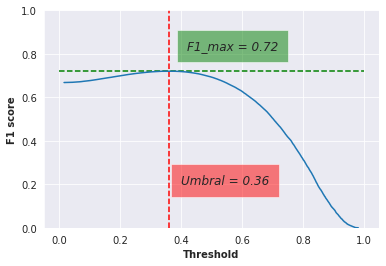

In [ ]:
tmp = np.sort(y_prob)
f1s = np.array(f1s)

fig, ax = plt.subplots()
fig.figsize = (12, 6)
ax.plot(tmp, f1s[::-1])
ax.vlines(thres, 0, 1, linestyles="--", color='red')
ax.hlines(expect_f1(y_prob, thres), 0, 1, linestyles='--', color='green')
ax.set_xlabel('Threshold', fontweight='bold')
ax.set_ylabel("F1 score", fontweight='bold')
ax.set_ylim([0, 1])
ax.text(0.4, 0.2, 'Umbral = 0.36', style='italic', fontsize='large',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10});
ax.text(0.42, 0.82, 'F1_max = 0.72', style='italic', fontsize='large',
        bbox={'facecolor': 'green', 'alpha': 0.5, 'pad': 10});

## **Referencias**

[1] Zachary C. Lipton, Charles Elkan, Balakrishnan Naryanaswamy. "Optimal Thresholding of Classifiers to Maximize F1 Measure". In ECML PKDD. 2014.

[2] https://es.wikipedia.org/wiki/Teorema_de_Bayes

[3] Hippocampus's Garden. "On Optimal Threshold for Maximizing F1 Score". Sitio web: https://hippocampus-garden.com/f1/ . 2021.

[4] Taboga, Marco (2021). "Normal distribution - Maximum Likelihood Estimation", Lectures on probability theory and mathematical statistics. Kindle Direct Publishing. Online appendix. https://www.statlect.com/fundamentals-of-statistics/normal-distribution-maximum-likelihood.

[5] Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011. Online User guide. https://scikit-learn.org/stable/modules/calibration.html#calibration